In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('seaborn-pastel')
import missingno as msno

In [3]:
pd.set_option('display.max_columns',40) # 컬럼 보여지는거 늘리기

In [4]:
# cust_data = pd.read_csv('/content/gdrive/My Drive/KYM/KYM/보험 사기자 예측 프로젝트/CUST_DATA.csv',encoding='utf-16')
cust_data = pd.read_csv('CUST_DATA.csv',encoding='utf-16')

In [5]:
cust_data.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,47,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


# Data Description

- cust data

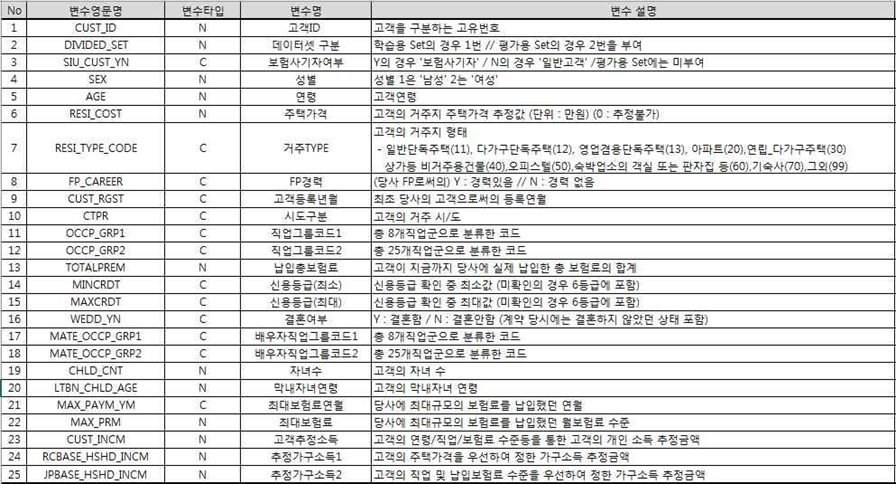

- claim data

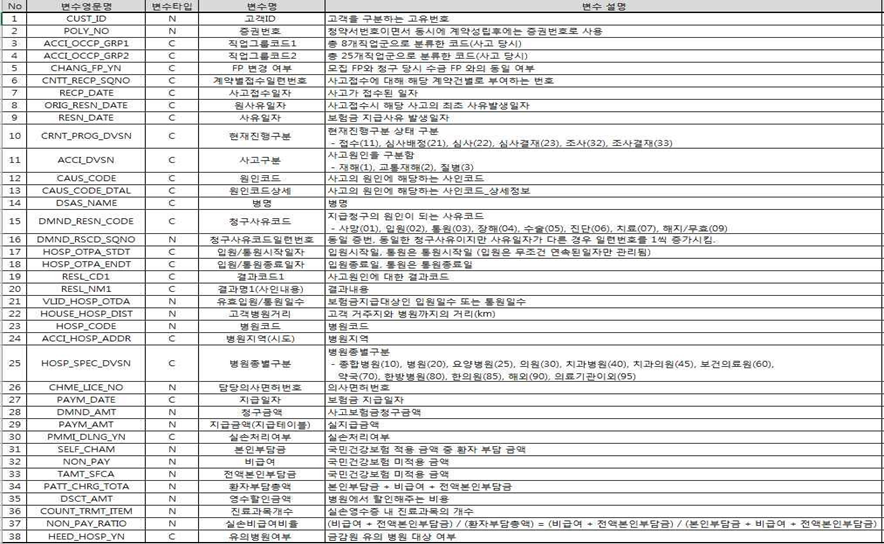

In [6]:
cust_data.columns=cust_data.columns.str.lower()

# EDA

In [7]:
cust_data.shape

(22400, 25)

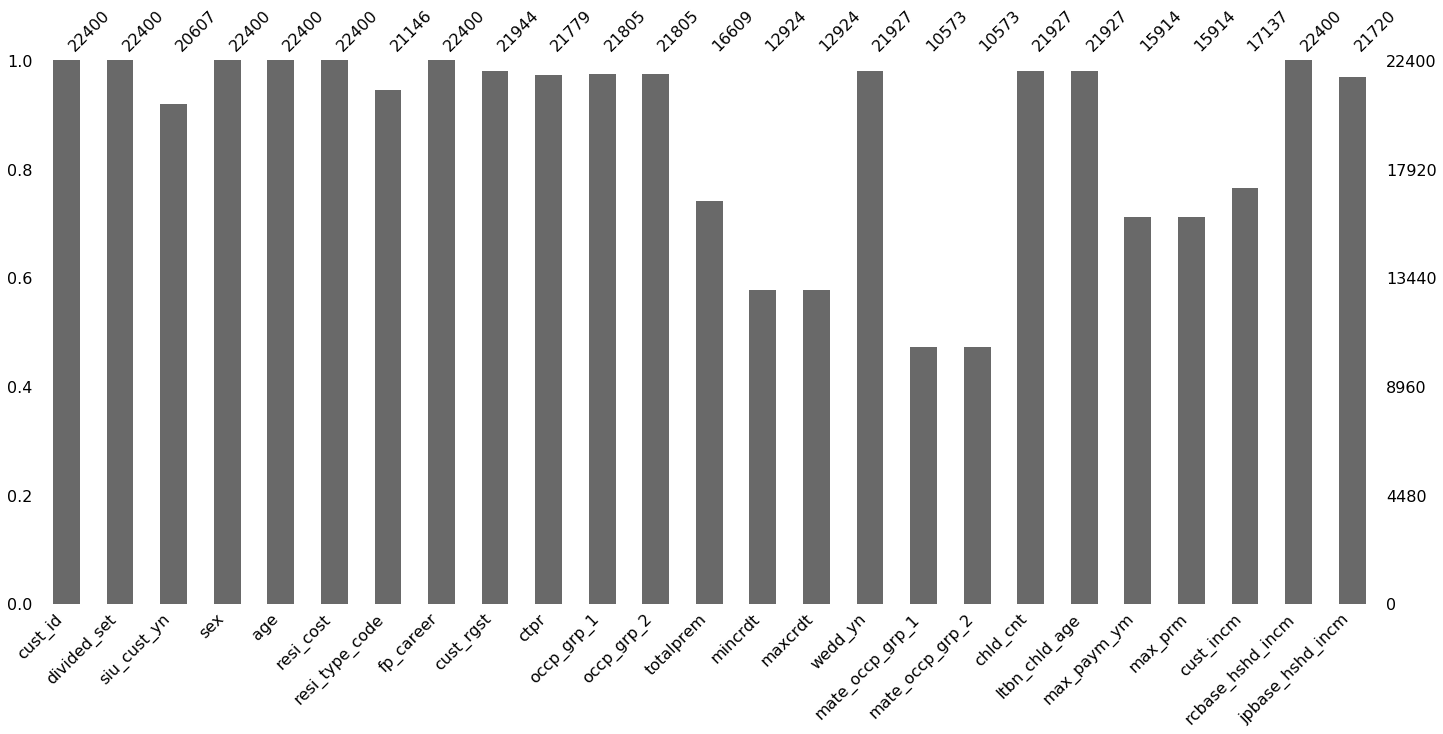

In [8]:
msno.bar(cust_data)

In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           22400 non-null  int64  
 1   divided_set       22400 non-null  int64  
 2   siu_cust_yn       20607 non-null  object 
 3   sex               22400 non-null  int64  
 4   age               22400 non-null  int64  
 5   resi_cost         22400 non-null  int64  
 6   resi_type_code    21146 non-null  float64
 7   fp_career         22400 non-null  object 
 8   cust_rgst         21944 non-null  float64
 9   ctpr              21779 non-null  object 
 10  occp_grp_1        21805 non-null  object 
 11  occp_grp_2        21805 non-null  object 
 12  totalprem         16609 non-null  float64
 13  mincrdt           12924 non-null  float64
 14  maxcrdt           12924 non-null  float64
 15  wedd_yn           21927 non-null  object 
 16  mate_occp_grp_1   10573 non-null  object

In [16]:
# 한글폰트 지정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

In [14]:
cust_data

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm
0,1,1,N,2,47,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,20048,2,NaN,1,34,5652,11.0,N,201103.0,경북,2.자영업,자영업,NaN,7.0,8.0,N,NaN,NaN,0.0,0.0,NaN,NaN,3331.0,3622,3331.0
22396,21483,1,N,2,30,31944,20.0,N,200306.0,경기,1.주부,주부,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,9361,8947.0
22397,21940,1,N,2,23,45972,20.0,N,200501.0,경기,8.기타,학생,NaN,6.0,6.0,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,11522,11484.0
22398,20356,1,N,1,15,27777,20.0,N,200306.0,경기,8.기타,학생,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7960,7614.0


Text(0.5, 1.0, '사기자 vs 일반인 비율')

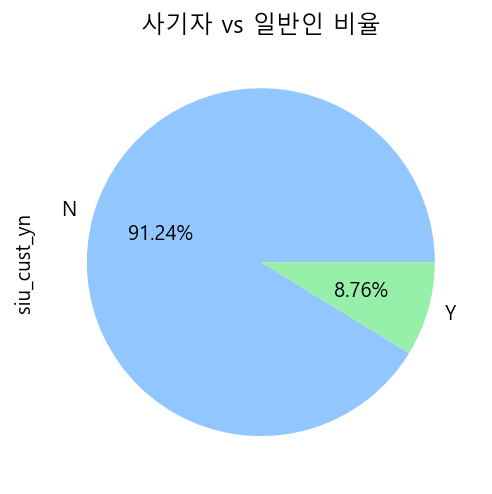

In [17]:
cust_data['siu_cust_yn'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('사기자 vs 일반인 비율')

Text(0.5, 1.0, '사기자 vs 일반인 vs 분석 대상')

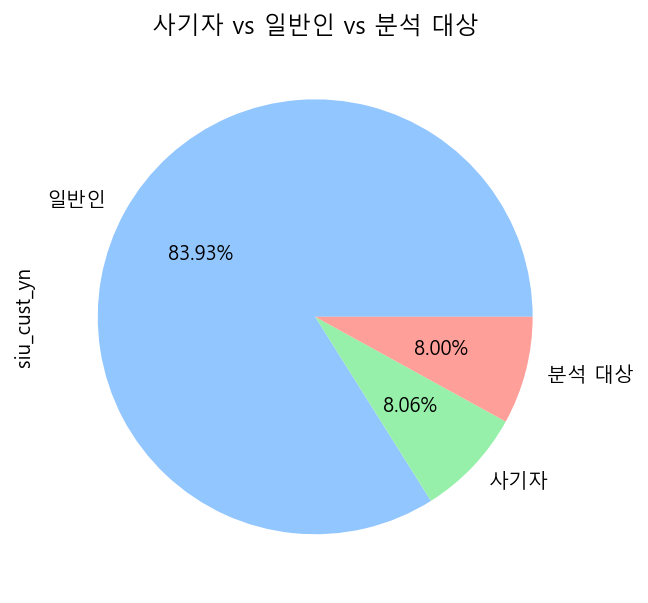

In [18]:
x= cust_data['siu_cust_yn'].value_counts(dropna=False)
x.index = ['일반인','사기자','분석 대상']
plt.figure(figsize=(10,5))
x.plot(kind='pie',autopct = '%.2f%%')
plt.title('사기자 vs 일반인 vs 분석 대상')

Text(0.5, 1.0, '성별 분포')

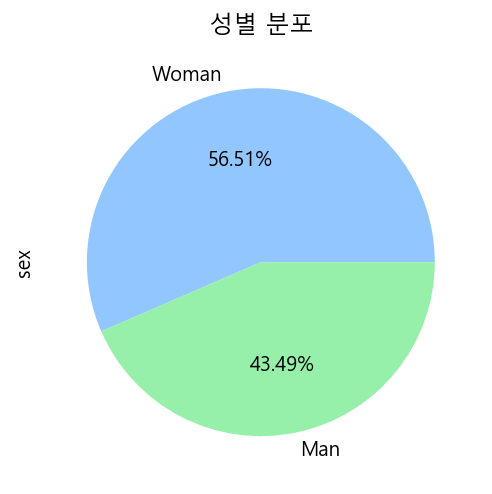

In [19]:
sex_cnt = cust_data['sex'].value_counts()
sex_cnt.index=['Woman','Man']
sex_cnt.plot(kind='pie',autopct='%.2f%%')
plt.title('성별 분포')

In [20]:
def bar_height(ax):
    for p in ax.patches:

        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=12)

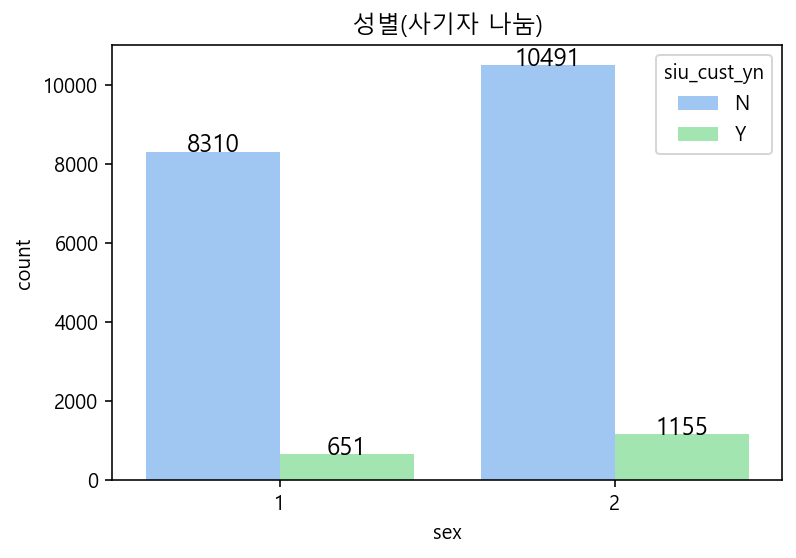

In [21]:
ax = sns.countplot(cust_data['sex'],hue=cust_data['siu_cust_yn'])
plt.title('성별(사기자 나눔)')
bar_height(ax)


posx and posy should be finite values
posx and posy should be finite values


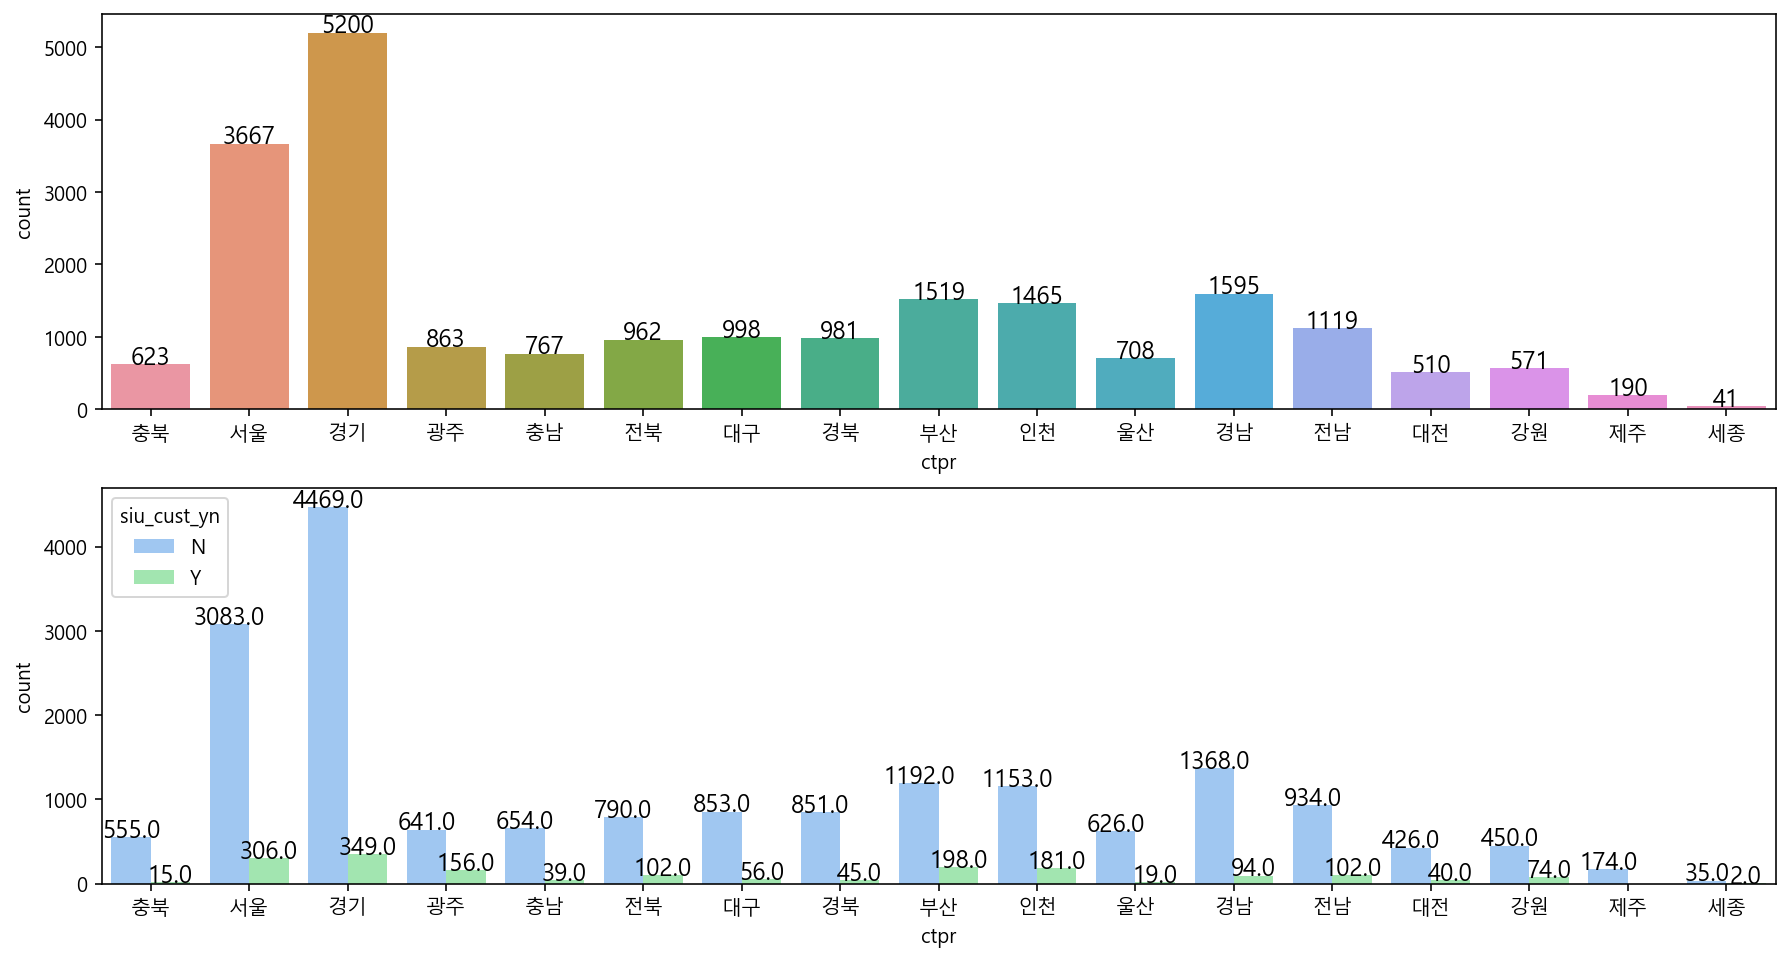

In [22]:
fig,axes = plt.subplots(2,1,figsize=(15,8))
ax=sns.countplot(cust_data['ctpr'],ax=axes[0])
bar_height(ax)
ax2 = sns.countplot(cust_data['ctpr'],hue=cust_data['siu_cust_yn'],ax=axes[1])
bar_height(ax2)

# Preprocessing

In [23]:
def show_na(data): # 결측치를 보여주는 함수
    df=pd.DataFrame(columns=['name','missing_value'])
    idx=0
    x = data.isnull().sum()
    for i in range(len(x.index)):
        if x[i] != 0:
            df.loc[idx,'name'] = x.index[i]
            df.loc[idx,'missing_value'] = x[i]
            idx+=1
        else:
            continue
    return df

In [24]:
show_na(cust_data)

,name,missing_value
0,siu_cust_yn,1793
1,resi_type_code,1254
2,cust_rgst,456
3,ctpr,621
4,occp_grp_1,595
5,occp_grp_2,595
6,totalprem,5791
7,mincrdt,9476
8,maxcrdt,9476
9,wedd_yn,473


In [25]:
# resi_type_code 와 resi_cost의 연관성 => resi_type_code가 결측치면 resi_cost는 0(추정불가)이다
cust_data[(cust_data['resi_cost']==0) & (cust_data['resi_type_code'].isnull())]

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm
2,3,1,N,1,60,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0
25,29,1,N,2,39,0,NaN,N,200106.0,울산,3.사무직,공무원,20961533.0,8.0,8.0,Y,5.서비스,2차산업 종사자,3.0,15.0,200105.0,467400.0,3574.0,0,7331.0
53,57,1,N,2,49,0,NaN,Y,200112.0,경기,6.제조업,2차산업 종사자,88277470.0,6.0,6.0,Y,6.제조업,운전직,2.0,21.0,201108.0,1034374.0,3314.0,0,7988.0
63,67,1,N,2,43,0,NaN,N,200203.0,경남,4.전문직,교육관련직,117113523.0,1.0,99.0,Y,2.자영업,자영업,2.0,12.0,201511.0,3490955.0,5512.0,0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22324,15802,1,N,2,16,0,NaN,N,200306.0,울산,8.기타,학생,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0.0
22325,8856,1,N,1,41,0,NaN,N,201012.0,전남,3.사무직,공무원,NaN,6.0,6.0,N,NaN,NaN,0.0,0.0,NaN,NaN,4302.0,0,4302.0
22341,4545,2,NaN,1,27,0,NaN,N,201502.0,NaN,3.사무직,사무직,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,3276.0,0,3276.0
22358,20120,1,N,2,40,0,NaN,N,201306.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,3644.0,0,3644.0


In [26]:
# resi_type_code 결측치 0으로 대체 -> 추정 불가기 때문에 따로 분류
cust_data['resi_type_code'].fillna(0,inplace=True)

In [27]:
# totalprem이 결측인 사람들은 물론 수입이 없는 사람들도 있지만 많인 사람들이 수입이 있기 때문에 중위값으로 대체
cust_data['totalprem'].fillna(cust_data['totalprem'].median(),inplace=True)

In [28]:
cust_data[(cust_data['mincrdt'].isnull()) & (cust_data['maxcrdt'].isnull())].shape

(9476, 25)

In [29]:
cust_data[['mincrdt','maxcrdt']].isnull().sum()

mincrdt    9476
maxcrdt    9476
dtype: int64

따라서 최소 신용등급을 모르면 최대 신용등급을 모른다

In [30]:
# 신용등급 미확인은 6등급으로 처리
cust_data['mincrdt'].fillna(6,inplace=True)
cust_data['maxcrdt'].fillna(6,inplace=True)

In [31]:
# 신용등급 10보다 큰 건 존재 X -> 미확인 분류
cust_data['mincrdt']=cust_data['mincrdt'].apply(lambda x: 6 if (x>10)or(x==0) else x)
cust_data['maxcrdt']=cust_data['maxcrdt'].apply(lambda x: 6 if (x>10)or(x==0) else x) 

In [32]:
# 거주자들의 최빈값으로 대체
cust_data['ctpr'].fillna(cust_data['ctpr'].mode()[0],inplace=True)

In [33]:
show_na(cust_data)

,name,missing_value
0,siu_cust_yn,1793
1,cust_rgst,456
2,occp_grp_1,595
3,occp_grp_2,595
4,wedd_yn,473
5,mate_occp_grp_1,11827
6,mate_occp_grp_2,11827
7,chld_cnt,473
8,ltbn_chld_age,473
9,max_paym_ym,6486


In [34]:
cust_data[cust_data['wedd_yn'].isnull()][['chld_cnt','ltbn_chld_age','mate_occp_grp_1']].isnull().sum()

chld_cnt           473
ltbn_chld_age      473
mate_occp_grp_1    473
dtype: int64

결혼 여부가 결측인 사람들에 대해 아이수,막내아이나이,자녀직업은 모두 결측값

-> 결혼 여부 결측치를 N이라고 지정 

In [35]:
idx1 = cust_data[cust_data['wedd_yn'].isnull()]['chld_cnt'].index
idx2 = cust_data[cust_data['wedd_yn'].isnull()]['ltbn_chld_age'].index

In [36]:
cust_data['chld_cnt'][idx1] = 0
cust_data['ltbn_chld_age'][idx2] = 0

In [37]:
cust_data['wedd_yn'].fillna('N',inplace=True)

In [38]:
cust_data['mate_occp_grp_1'].fillna('1.주부',inplace=True)
cust_data['mate_occp_grp_2'].fillna('1.주부',inplace=True)

In [39]:
cust_data['occp_grp_1'].unique()

array(['3.사무직', '5.서비스', '2.자영업', '4.전문직', '6.제조업', '1.주부', '8.기타',
       '7.1차산업', nan], dtype=object)

In [40]:
cust_data.head()

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm
0,1,1,N,2,47,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,6.0,6.0,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,0.0,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,6.0,6.0,N,1.주부,1.주부,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,6.0,N,1.주부,1.주부,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,0.0,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [41]:
cust_data[cust_data['occp_grp_1']=='1.주부']['cust_incm'].describe()

count    3815.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: cust_incm, dtype: float64

주부의 수입은 없으므로 cust_incm이 0인 사람은 주부로 치환

반대로 주부는 cust_incm=0 으로 치환

In [42]:
idx = cust_data[(cust_data['occp_grp_1'] == '1.주부') & (cust_data['cust_incm'].isnull())].index
cust_data['cust_incm'][idx] = 0

In [43]:
cust_data[(cust_data['occp_grp_1'].isnull()) & (cust_data['cust_incm']==0)].index

Int64Index([], dtype='int64')

In [44]:
idx = cust_data[(cust_data['occp_grp_1'].isnull())&(cust_data['cust_incm'].isnull())].index
cust_data['occp_grp_1'][idx] = '1.주부'
cust_data['cust_incm'][idx] = 0

In [45]:
cust_data['cust_incm'].fillna(cust_data.groupby('occp_grp_1')['cust_incm'].transform('mean'),inplace=True)

In [46]:
show_na(cust_data)

,name,missing_value
0,siu_cust_yn,1793
1,cust_rgst,456
2,occp_grp_1,123
3,occp_grp_2,595
4,max_paym_ym,6486
5,max_prm,6486
6,jpbase_hshd_incm,680


- occp_grp_1 결측치 대체 => modeling 으로 대체

In [47]:
cust_data.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm'],
      dtype='object')

In [48]:
tmp=cust_data[['fp_career','totalprem','cust_incm','occp_grp_1','age','mincrdt','maxcrdt']].copy()

In [49]:
from sklearn.preprocessing import OneHotEncoder
def ohe_trans(df, col):
    ohe = OneHotEncoder()
    x = ohe.fit_transform(df[col].values.reshape(-1,1)).toarray()
    tmp = []
    for i in range(df[col].unique().size):
        tmp.append(col[0]+str(i))
        
    ohe_df = pd.DataFrame(x, columns=tmp)
    return ohe_df

In [50]:
f_df = ohe_trans(tmp,'fp_career')
tmp = pd.concat([f_df,tmp],axis=1)
tmp.drop('fp_career',axis=1,inplace=True)

In [51]:
train = tmp[tmp['occp_grp_1'].notnull()]
test = tmp[tmp['occp_grp_1'].isnull()]
train_x = train.drop('occp_grp_1',axis=1)
train_y = train['occp_grp_1']
test_x = test.drop('occp_grp_1',axis=1)
test_y = test['occp_grp_1']

In [52]:
# 검정용 데이터 생성
from sklearn.model_selection import train_test_split
train_X,valid_X,train_Y,valid_Y = train_test_split(train_x,train_y,test_size=.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier(n_estimators=400,max_depth=10,random_state = 42,max_features = 'log2')
xgb = XGBClassifier(n_estimators=400,random_state=42,eta = 0.1,max_depth=10)

In [54]:
rf.fit(train_X,train_Y)
pred_rf = rf.predict(valid_X)

In [55]:
xgb.fit(train_X,train_Y)
pred_xgb = xgb.predict(valid_X)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print('rf score: {}\nxgb score: {}'.format(accuracy_score(valid_Y,pred_rf),accuracy_score(valid_Y,pred_xgb)))

rf score: 0.6862657091561939
xgb score: 0.670556552962298


randomforest로 모델 결정

In [58]:
rf.fit(train_x,train_y)
pred = rf.predict(test_x)

In [59]:
naidx = test_y.index
cust_data['occp_grp_1'][naidx] = pred

In [60]:
show_na(cust_data)

,name,missing_value
0,siu_cust_yn,1793
1,cust_rgst,456
2,occp_grp_2,595
3,max_paym_ym,6486
4,max_prm,6486
5,jpbase_hshd_incm,680


In [61]:
cust_data['age'].describe()

count    22400.000000
mean        44.734866
std         15.445707
min          2.000000
25%         34.000000
50%         46.000000
75%         56.000000
max         89.000000
Name: age, dtype: float64

In [62]:
# ~19,~29,~39,~49,~59,60~
cust_data['age'] = pd.cut(cust_data['age'],[0,20,30,40,50,60,100],labels=['10s','20s','30s','40s','50s','60over'],right=False)

In [63]:
cust_data['chld_cnt'].describe()

count    22400.000000
mean         0.694509
std          0.949046
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: chld_cnt, dtype: float64

In [64]:
cust_data['chld_cnt'] = pd.cut(cust_data['chld_cnt'],[0,1,3,7],labels=['no','small','big'],right=False)

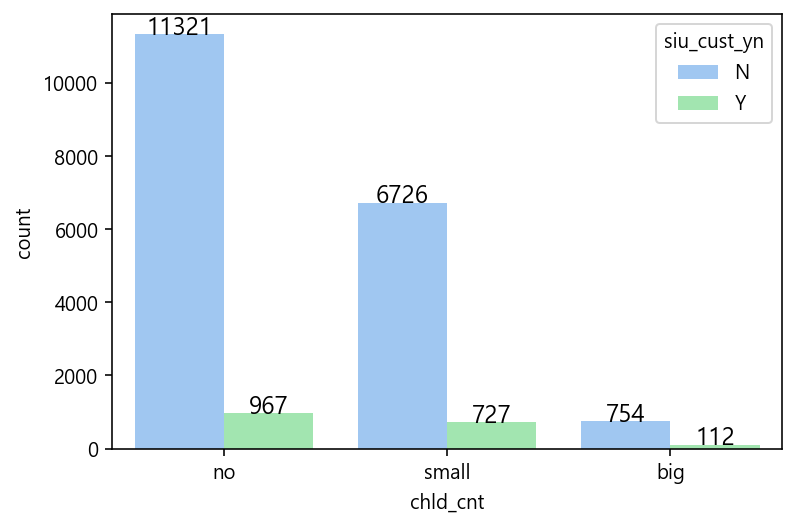

In [65]:
ax=sns.countplot(cust_data['chld_cnt'],hue=cust_data['siu_cust_yn'])
bar_height(ax)

[Text(0.5, 1.0, '일반인 성별 분포(1:M,2:W)')]

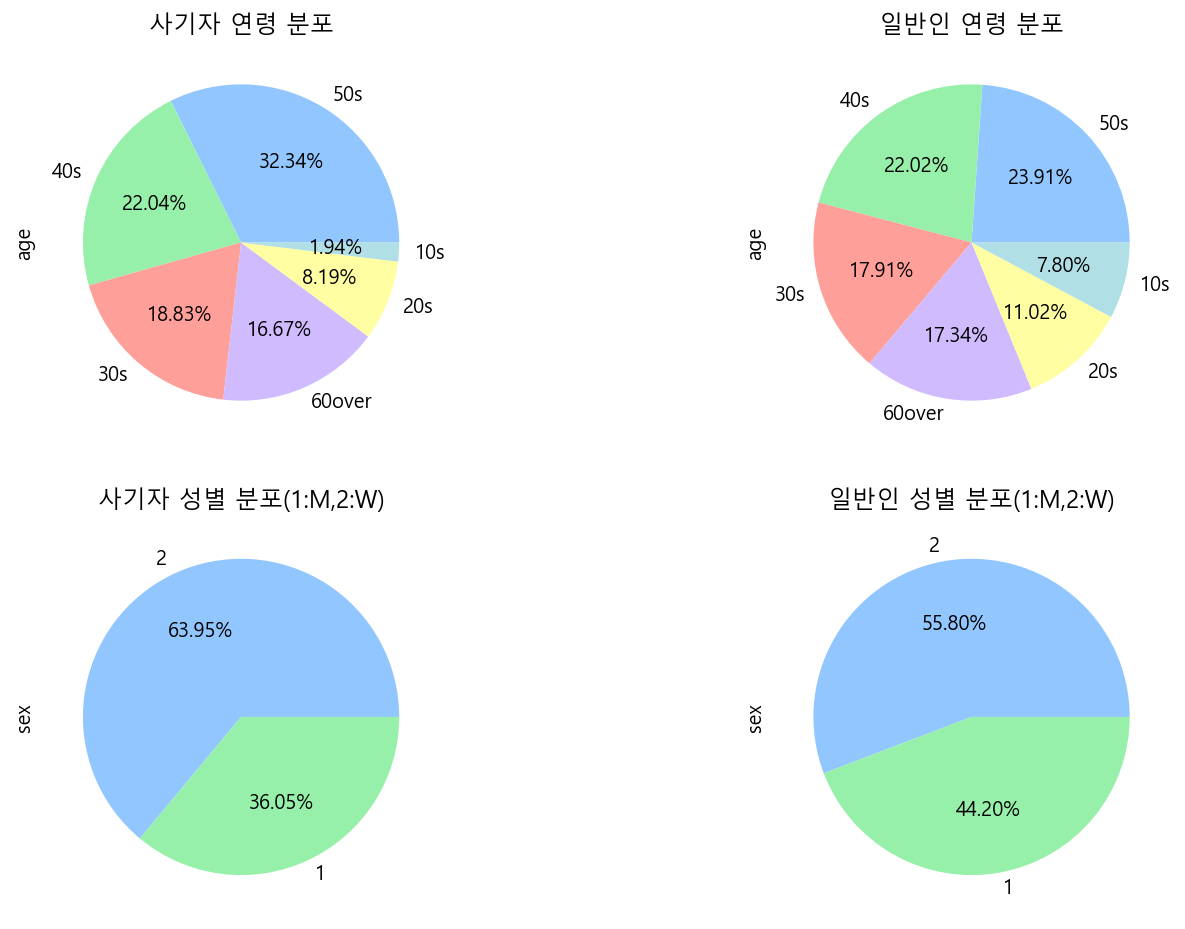

In [66]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
fraud_age = cust_data[cust_data['siu_cust_yn'] == 'Y']['age']
general_age = cust_data[cust_data['siu_cust_yn'] == 'N']['age']
fraud_sex = cust_data[cust_data['siu_cust_yn'] == 'Y']['sex']

general_sex = cust_data[cust_data['siu_cust_yn'] == 'N']['sex']

fraud_age.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[0,0])
general_age.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[0,1])
fraud_sex.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[1,0])
general_sex.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[1,1])
axes[0,0].set(title='사기자 연령 분포')
axes[0,1].set(title = '일반인 연령 분포')
axes[1,0].set(title = '사기자 성별 분포(1:M,2:W)')
axes[1,1].set(title = '일반인 성별 분포(1:M,2:W)')

In [67]:
# claim_data = pd.read_csv('/content/gdrive/My Drive/KYM/KYM/보험 사기자 예측 프로젝트/CLAIM_DATA.csv',encoding='utf-16')
claim_data = pd.read_csv('CLAIM_DATA.csv',encoding='utf-16')

In [68]:
claim_data.columns = claim_data.columns.str.lower()

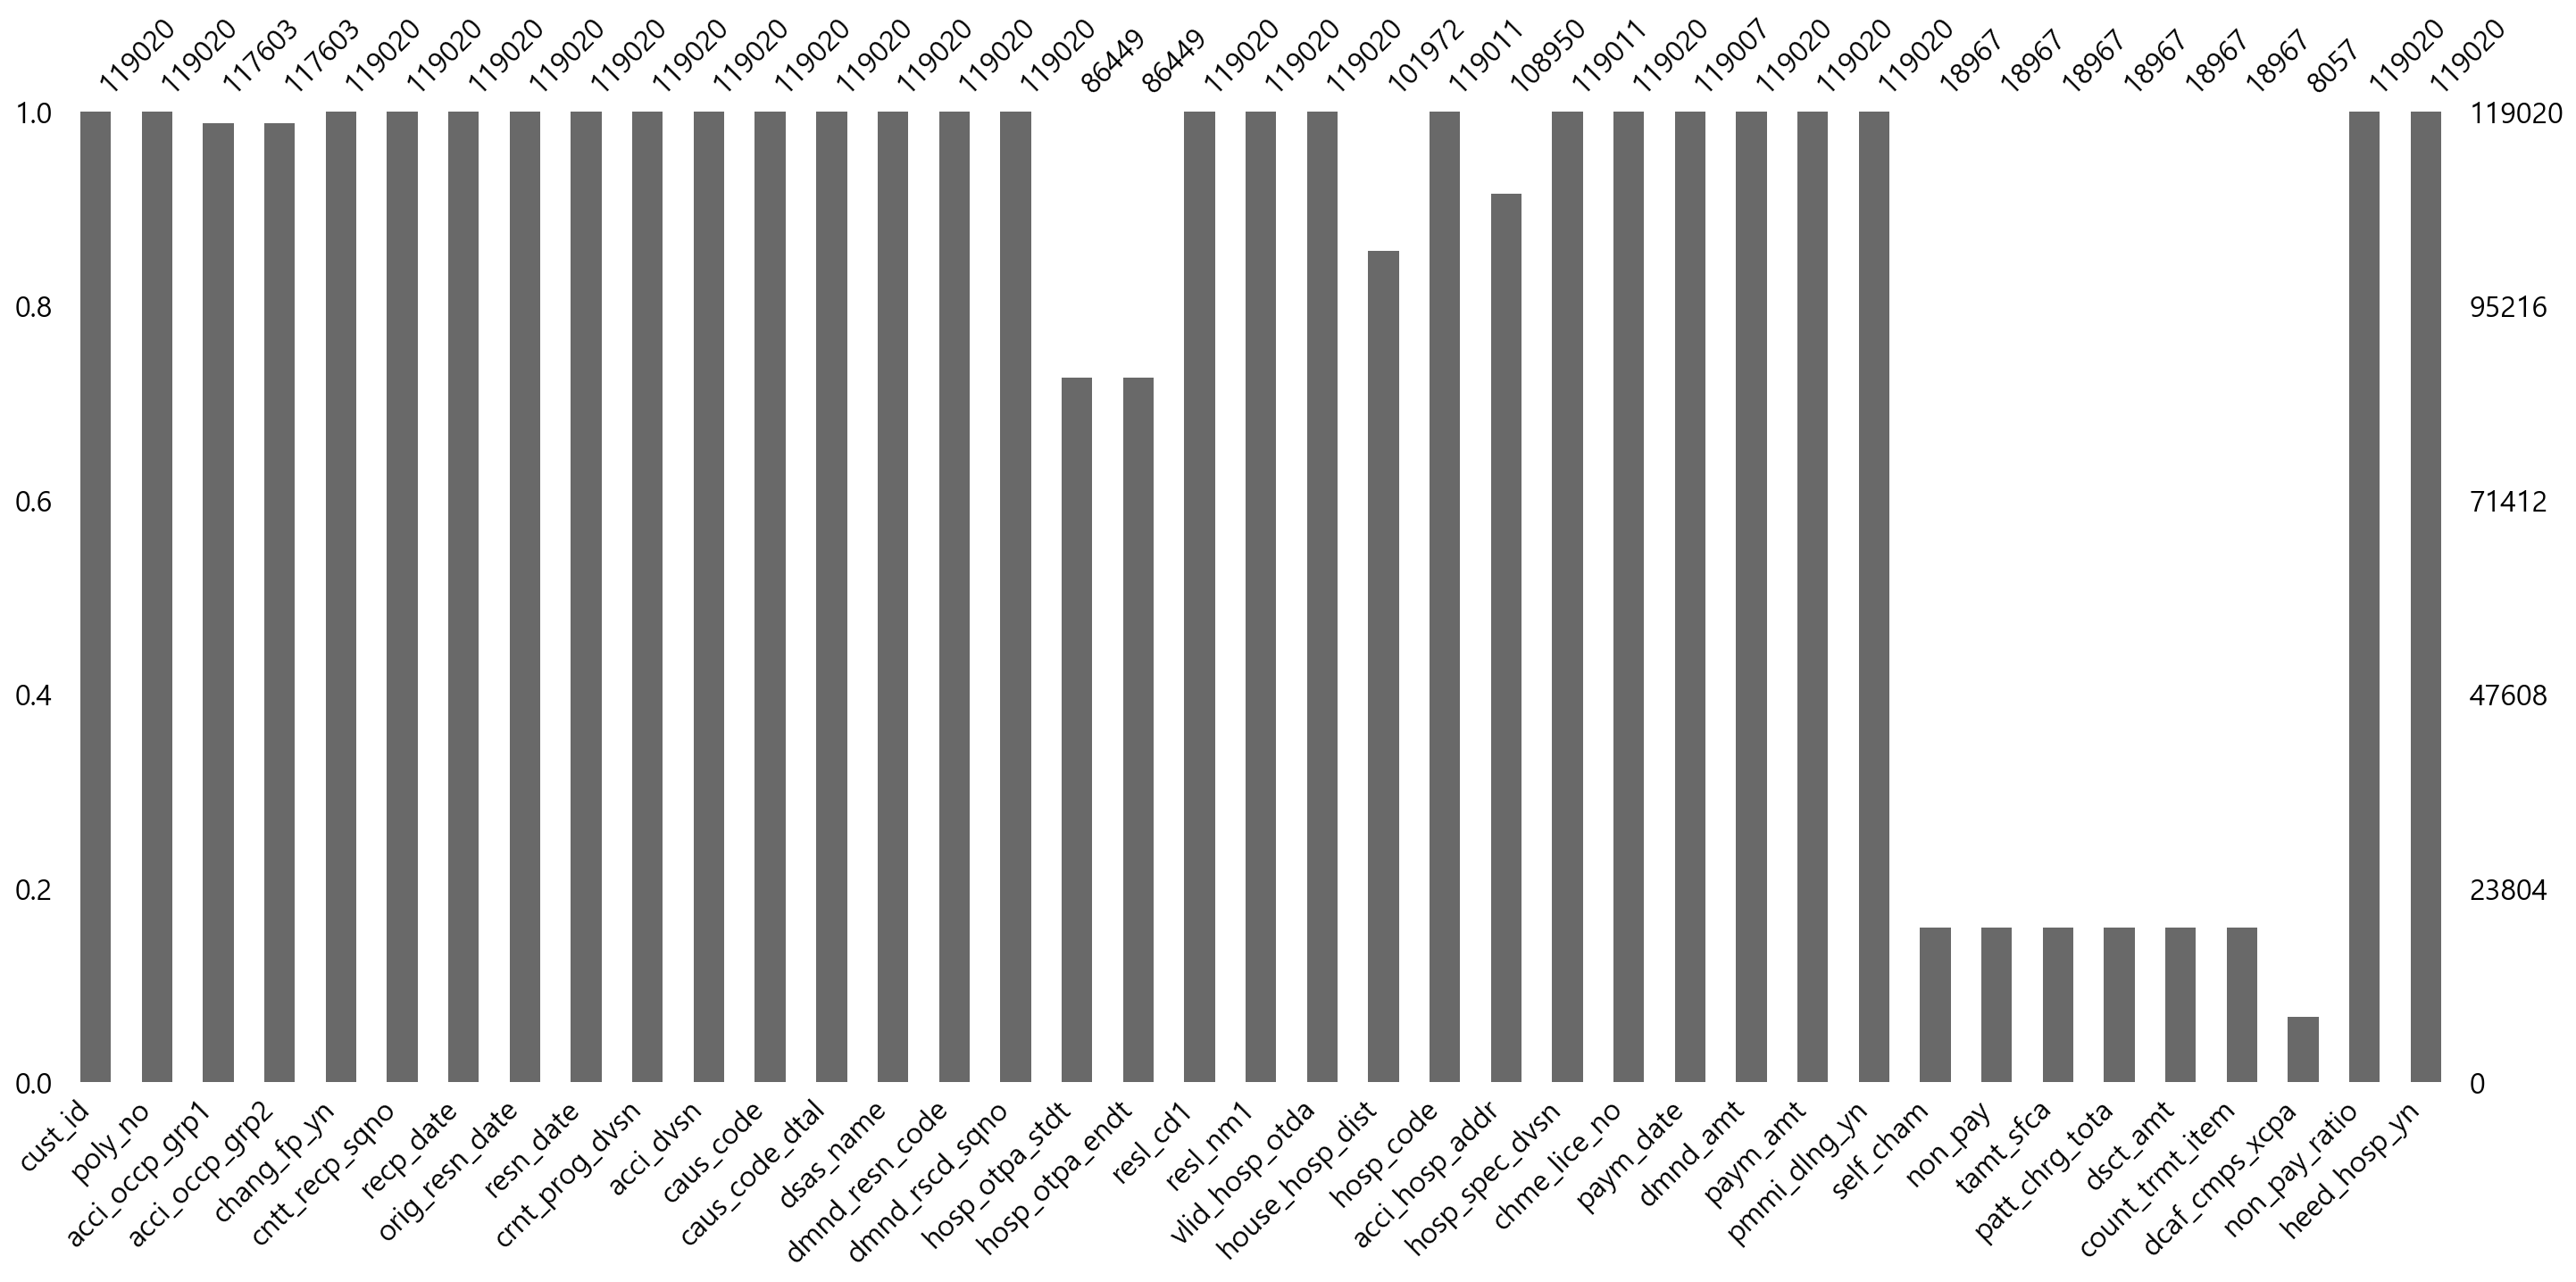

In [69]:
msno.bar(claim_data)

In [70]:
claim_data.head()

,cust_id,poly_no,acci_occp_grp1,acci_occp_grp2,chang_fp_yn,cntt_recp_sqno,recp_date,orig_resn_date,resn_date,crnt_prog_dvsn,acci_dvsn,caus_code,caus_code_dtal,dsas_name,dmnd_resn_code,dmnd_rscd_sqno,hosp_otpa_stdt,hosp_otpa_endt,resl_cd1,resl_nm1,vlid_hosp_otda,house_hosp_dist,hosp_code,acci_hosp_addr,hosp_spec_dvsn,chme_lice_no,paym_date,dmnd_amt,paym_amt,pmmi_dlng_yn,self_cham,non_pay,tamt_sfca,patt_chrg_tota,dsct_amt,count_trmt_item,dcaf_cmps_xcpa,non_pay_ratio,heed_hosp_yn
0,5936,1365,8.기타,학생,Y,2006011200001,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,20000,20000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
1,5936,6151,8.기타,학생,Y,2006011200002,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,30000,30000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
2,5936,10364,8.기타,학생,Y,2006011200003,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,40000,40000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
3,1043,1247,1.주부,주부,N,2006011200004,20060112,20060105,20060105,23,3,A09,#,기타세균성창자감염|손목및손의2도화상|피부염,2,1,20060105.0,20060110.0,A09,감염성 및 상세불명 기원의 기타위장염 및 결장염,6,NaN,12537.0,NaN,95.0,17647,20060113.0,60000,60000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
4,8545,11236,1.주부,주부,Y,2006011200005,20060112,20060110,20060110,11,3,I83,#,좌측하지정맥류혈관발거술|레이저소작술,5,1,NaN,NaN,I83,다리(하지)의 정맥류,0,4.88,2305.0,경기,30.0,25697,20060112.0,200000,200000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N


In [71]:
claim_data[['cust_id','vlid_hosp_otda']].head(10) # 입원횟수

,cust_id,vlid_hosp_otda
0,5936,2
1,5936,2
2,5936,2
3,1043,6
4,8545,0
5,4734,4
6,9416,0
7,20267,23
8,2778,29
9,9019,13


In [72]:
pvt = claim_data.pivot_table(index='cust_id',values='vlid_hosp_otda',aggfunc='mean')

mean_days = pvt.reset_index()

In [73]:
cust_data = cust_data.merge(mean_days)
cust_data.rename({'vlid_hosp_otda':'mean_days'},axis=1,inplace=True)

In [74]:
# 사고구분 및 청구사유 횟수 : ACCI_DVSN, DMND_RESN_CODE

In [75]:
claim_data['acci_dvsn'].unique() # 사고 구분

array([1, 3, 2], dtype=int64)

In [76]:
claim_data['dmnd_resn_code'].unique() # 청구사유코드

array([3, 2, 5, 6, 4, 1, 7, 9], dtype=int64)

In [77]:
tmp=claim_data[['cust_id','acci_dvsn','dmnd_resn_code']]
tmp.head()

,cust_id,acci_dvsn,dmnd_resn_code
0,5936,1,3
1,5936,1,3
2,5936,1,3
3,1043,3,2
4,8545,3,5


In [78]:
multi = pd.MultiIndex.from_product(list(map(set, tmp.values.T)))
cross_table=claim_data.groupby(['cust_id','acci_dvsn','dmnd_resn_code']).size()

In [79]:
cross_table=cross_table.reindex(multi,fill_value=0).unstack([1,2])
cross_table

1                       2                       3                     
       1  2  3  4  5  6  7  9  1  2  3  4  5  6  7  9  1  2  3  4  5  6  7  9
1      0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0
2      0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0
3      0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
4      0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
5      0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
22396  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
22397  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
22398  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
22399  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
22400  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0

[22400 rows x 24 columns]

In [80]:
cols=[]
for x,y in cross_table.columns:
    cols.append('{}_{}'.format(x,y))
cross_table.columns = cols
cross_table.head()

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,2_7,2_9,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
cross_table=cross_table.reset_index()
cross_table.rename({'index':'cust_id'},axis=1,inplace=True)

In [82]:
cust_data = pd.merge(cust_data,cross_table)

In [83]:
cust_data.head()

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,...,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,2_7,2_9,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,1,N,2,40s,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,6.0,6.0,Y,3.사무직,2차산업 종사자,small,13.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,1,N,1,50s,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,small,17.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,1,N,1,60over,0,0.0,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,6.0,6.0,N,1.주부,1.주부,no,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,N,2,60over,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,6.0,N,1.주부,1.주부,no,0.0,...,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,N,2,50s,0,0.0,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,big,19.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
show_na(cust_data)

,name,missing_value
0,siu_cust_yn,1793
1,cust_rgst,456
2,occp_grp_2,595
3,max_paym_ym,6486
4,max_prm,6486
5,jpbase_hshd_incm,680


In [85]:
# 세부 분류 변수 삭제
cust_data.drop(['occp_grp_2','mate_occp_grp_2'],axis=1,inplace=True)

In [86]:
# 분산이 0인 데이터
drop_col = []
x=cust_data.describe().loc['std']== 0
for i in range(len(x)):
    if x[i]:
        drop_col.append(x.index[i])
    else:
        continue

In [87]:
cust_data.drop(drop_col,axis=1,inplace=True)

In [88]:
# max_prm 유의미하지 않다고 판단
# max_paym_ym은 연도를 가르키기 때문에 삭제 필요
# 고객 등록연월도 같은 이유로 삭제
# 추정가구 소득 jpbase_hshd_incm은 rcbase와 기준만 다른 것이므로 삭제
cust_data.drop(['max_prm','max_paym_ym','cust_rgst','jpbase_hshd_incm'],axis=1,inplace=True)

[Text(0.5, 1.0, 'general')]

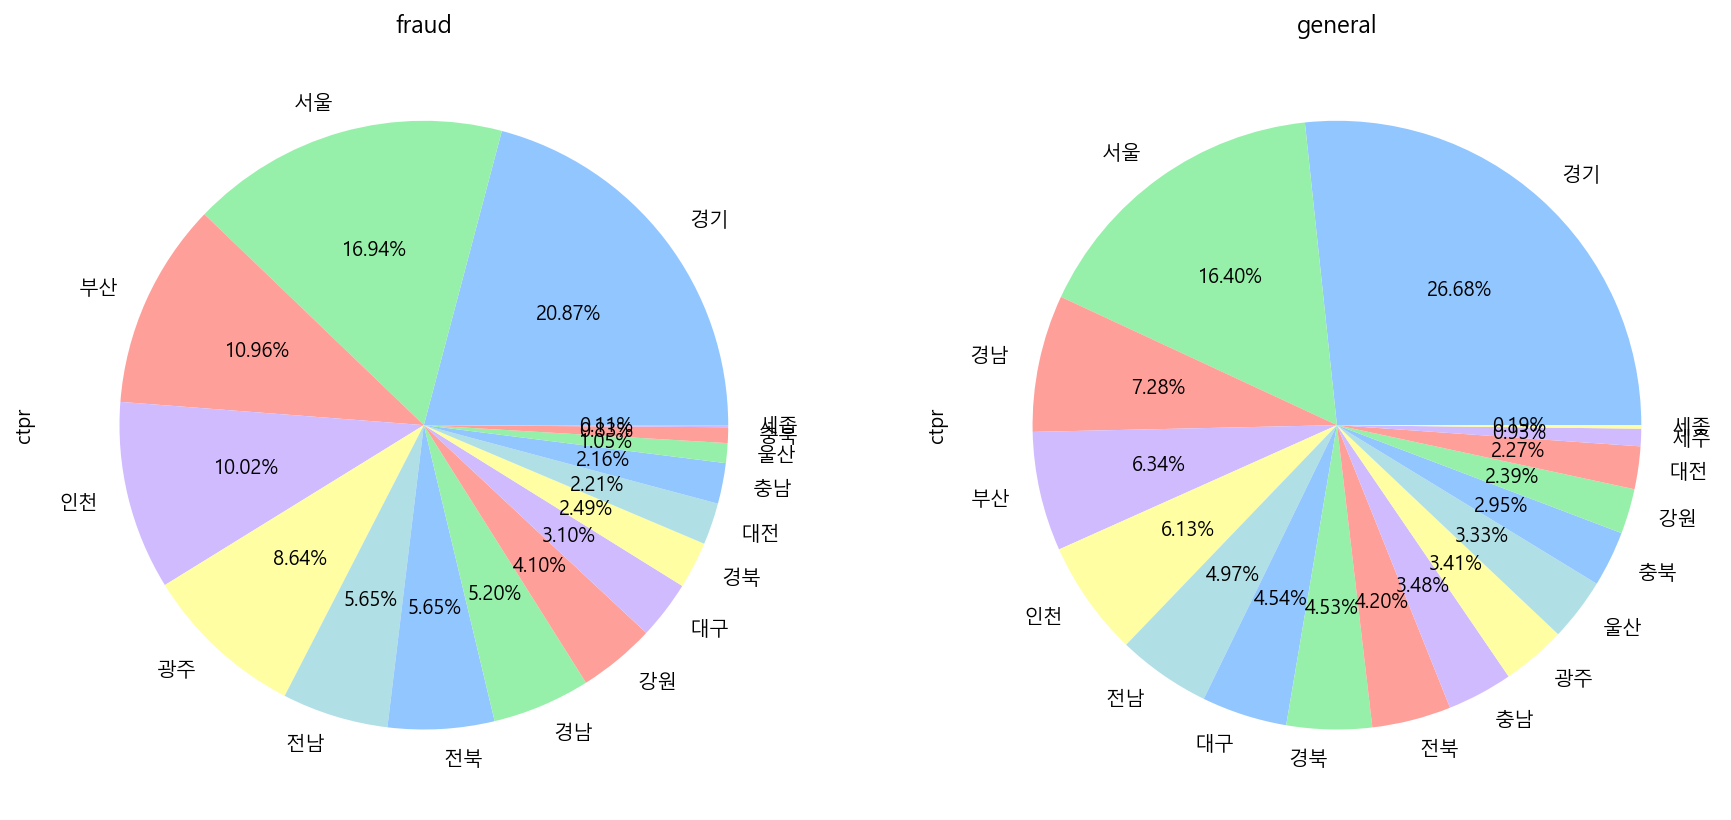

In [89]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
fraud_ctpr = cust_data[cust_data['siu_cust_yn'] == 'Y']['ctpr']
general_ctpr = cust_data[cust_data['siu_cust_yn'] == 'N']['ctpr']
fraud_ctpr.value_counts().plot(kind='pie',autopct='%.2f%%',ax=ax1)
ax1.set(title='fraud')
general_ctpr.value_counts().plot(kind='pie',autopct='%.2f%%',ax=ax2)
ax2.set(title='general')

전체적으로 비슷하기 때문에 ctpr 삭제

In [90]:
cust_data.drop('ctpr',axis=1,inplace=True)

In [91]:
show_na(cust_data) # 종속변수만 남음

,name,missing_value
0,siu_cust_yn,1793


[Text(0.5, 1.0, 'general-occp')]

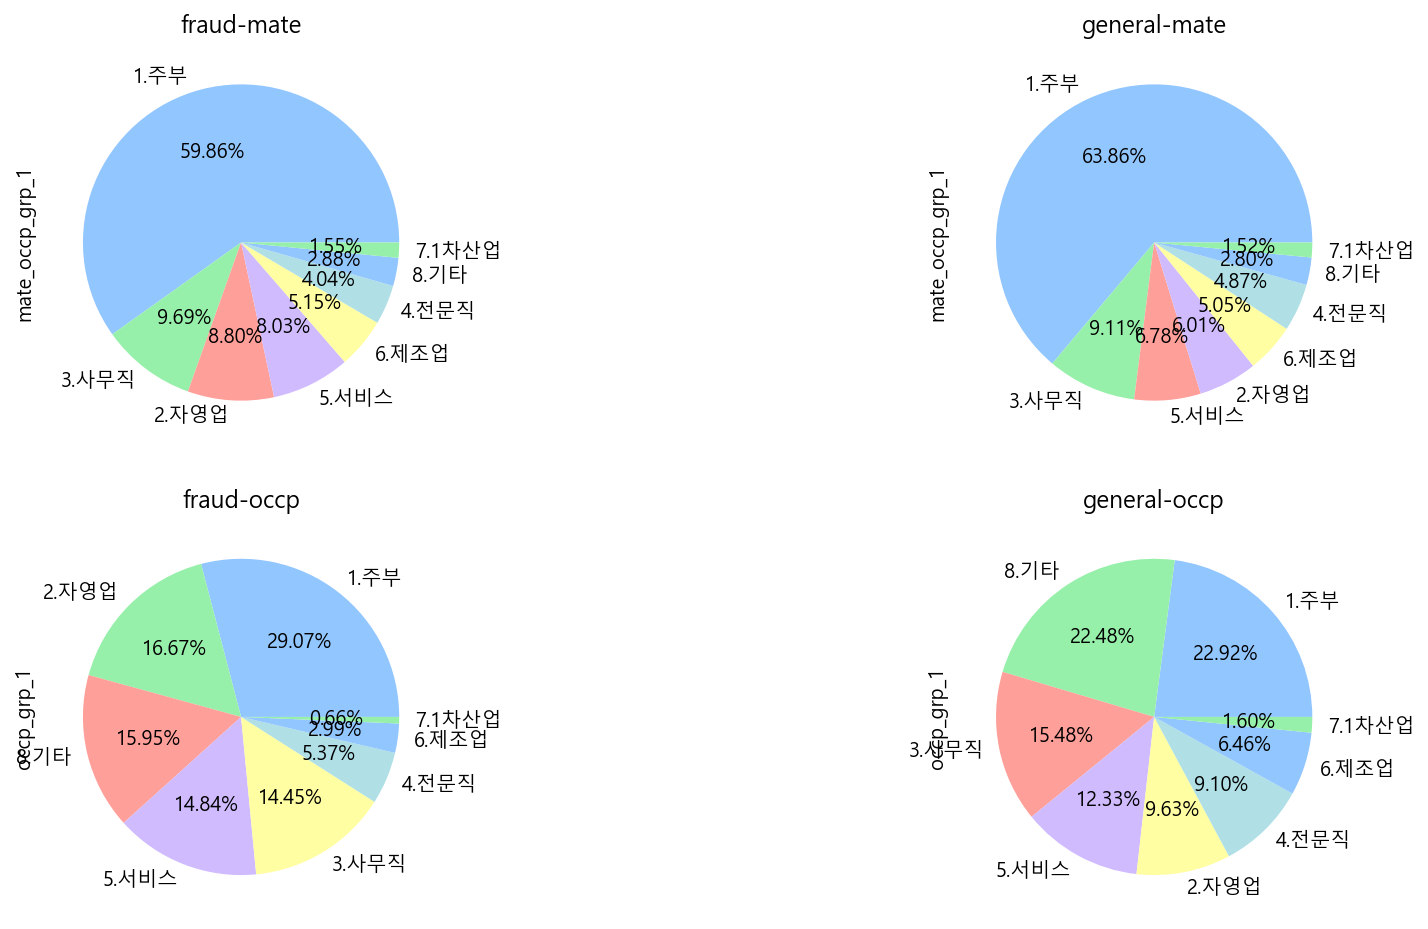

In [92]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
fraud_mate = cust_data[cust_data['siu_cust_yn'] == 'Y']['mate_occp_grp_1']
general_mate = cust_data[cust_data['siu_cust_yn'] == 'N']['mate_occp_grp_1']
fraud_mate.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[0,0])
axes[0,0].set(title='fraud-mate')
general_mate.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[0,1])
axes[0,1].set(title='general-mate')
fraud_occp = cust_data[cust_data['siu_cust_yn'] == 'Y']['occp_grp_1']
general_occp = cust_data[cust_data['siu_cust_yn'] == 'N']['occp_grp_1']
fraud_occp.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[1,0])
axes[1,0].set(title='fraud-occp')
general_occp.value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[1,1])
axes[1,1].set(title='general-occp')

mate_occp_grp_1은 큰 차이가 없는 반면에 occp는 큰 차이가 있음을 알 수 있다.
따라서 mate_occp_grp_1 삭제

In [ ]:
cust_data.drop('mate_occp_grp_1',axis=1,inplace=True)

In [ ]:
cust_data['resi_type_code'] = cust_data['resi_type_code'].astype('category')

In [ ]:
cust_data.info() # age,fp_career,occp_grp_1, wedd_yn , chlld_cnt -> 더미 변수화

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cust_id           22400 non-null  int64   
 1   divided_set       22400 non-null  int64   
 2   siu_cust_yn       20607 non-null  object  
 3   sex               22400 non-null  int64   
 4   age               22400 non-null  category
 5   resi_cost         22400 non-null  int64   
 6   resi_type_code    22400 non-null  category
 7   fp_career         22400 non-null  object  
 8   occp_grp_1        22400 non-null  object  
 9   totalprem         22400 non-null  float64 
 10  mincrdt           22400 non-null  float64 
 11  maxcrdt           22400 non-null  float64 
 12  wedd_yn           22400 non-null  object  
 13  chld_cnt          22400 non-null  category
 14  ltbn_chld_age     22400 non-null  float64 
 15  cust_incm         22400 non-null  float64 
 16  rcbase_hshd_incm  2240

In [ ]:
final_data = pd.get_dummies(cust_data.drop('siu_cust_yn',axis=1)) # 종속변수를 제외하고 모두 더미변수화
final_data.columns

Index(['cust_id', 'divided_set', 'sex', 'resi_cost', 'totalprem', 'mincrdt',
       'maxcrdt', 'ltbn_chld_age', 'cust_incm', 'rcbase_hshd_incm',
       'mean_days', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_9',
       '2_1', '2_2', '2_3', '2_4', '2_5', '2_6', '3_1', '3_2', '3_3', '3_4',
       '3_5', '3_6', '3_7', '3_9', 'age_10s', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60over', 'resi_type_code_0.0', 'resi_type_code_11.0',
       'resi_type_code_12.0', 'resi_type_code_13.0', 'resi_type_code_20.0',
       'resi_type_code_30.0', 'resi_type_code_40.0', 'resi_type_code_50.0',
       'resi_type_code_60.0', 'resi_type_code_70.0', 'resi_type_code_99.0',
       'fp_career_N', 'fp_career_Y', 'occp_grp_1_1.주부', 'occp_grp_1_2.자영업',
       'occp_grp_1_3.사무직', 'occp_grp_1_4.전문직', 'occp_grp_1_5.서비스',
       'occp_grp_1_6.제조업', 'occp_grp_1_7.1차산업', 'occp_grp_1_8.기타', 'wedd_yn_N',
       'wedd_yn_Y', 'chld_cnt_no', 'chld_cnt_small', 'chld_cnt_big'],
      dtype='object')

In [ ]:
final_data = pd.concat([cust_data['siu_cust_yn'],final_data],axis=1)
dic={'N':0,'Y':1}
final_data['siu_cust_yn'] = final_data['siu_cust_yn'].map(dic)

- train, test split

In [ ]:
train = final_data[final_data['divided_set'] == 1]
test = final_data[final_data['divided_set'] == 2]

In [ ]:
print("trian shape: {}\ntest shape: {}".format(train.shape,test.shape))

trian shape: (20607, 66)
test shape: (1793, 66)


In [ ]:
train.drop('cust_id',axis=1,inplace=True)
test.drop('cust_id',axis=1,inplace=True)

# Modeling

In [ ]:
answer = pd.read_csv('/content/gdrive/My Drive/KYM/KYM/보험 사기자 예측 프로젝트/answer.csv')
answer.columns = answer.columns.str.lower()

In [ ]:
train_x = train.drop('siu_cust_yn',axis=1)
train_y = train['siu_cust_yn'].values
test_x = test.drop('siu_cust_yn',axis=1)
test_y = answer['siu_cust_yn'].values

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier

In [ ]:
rf = RandomForestClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
et = ExtraTreesClassifier()
gra = GradientBoostingClassifier()
svm = SVC()
lgbm = LGBMClassifier()

In [ ]:
rfc_parm={"max_depth":[None,5,10],'n_estimators':[200],'max_features':[None,'sqrt','log2']}
et_parm = {'n_jobs': [-1],'n_estimators':[200],"max_depth":[None,5,10],
          'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}
gra_parm = {'n_estimators':[200],'max_depth':[None,5,10]}
xgb_parm = {'max_depth':[3,5,10],'gamma':[0,0.5,1],'max_features':['auto','log','log2'],'eta':[0.5,0.1,0.3]}
svm_parm = {'gamma':['scale','auto'],'degree':[5,10],'kernel':['linear','rbf'],'C':[0.025,0.5]}

In [ ]:
rfc_cv=GridSearchCV(rf,rfc_parm) 

gra_cv=GridSearchCV(gra,gra_parm) 
xgb_cv=GridSearchCV(xgb,xgb_parm) 
 

In [ ]:
score_table = pd.DataFrame(columns=['Model','score'])

In [ ]:
rfc_cv.fit(train_x,train_y)
pred=rfc_cv.predict(test_x)
idx=0
score_table.loc[idx,'Model'] = 'rfc_cv'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
lgbm.fit(train_x,train_y)
pred = lgbm.predict(test_x)
idx=1
score_table.loc[idx,'Model'] = 'lgbm'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
gra_cv.fit(train_x,train_y)
pred=gra_cv.predict(test_x)
idx=2
score_table.loc[idx,'Model'] = 'gra_cv'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
xgb_cv.fit(train_x,train_y)
pred = xgb_cv.predict(test_x)
idx=3
score_table.loc[idx,'Model'] = 'xgb_cv'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
idx=4
score_table.loc[idx,'Model'] = 'rf'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
gra.fit(train_x,train_y)
pred = gra.predict(test_x)
idx=6
score_table.loc[idx,'Model'] = 'gra'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
xgb.fit(train_x,train_y)
pred = xgb.predict(test_x)
idx=7
score_table.loc[idx,'Model'] = 'xgb'
score_table.loc[idx,'score'] = accuracy_score(test_y,pred)

In [ ]:
score_table['score'] = score_table['score'].apply(lambda x: np.round(x,3))
score_table

,Model,score
0,rfc_cv,0.873
2,gra_cv,0.867
1,lgbm,0.871
3,xgb_cv,0.874
4,rf,0.880
6,gra,0.872
7,xgb,0.874


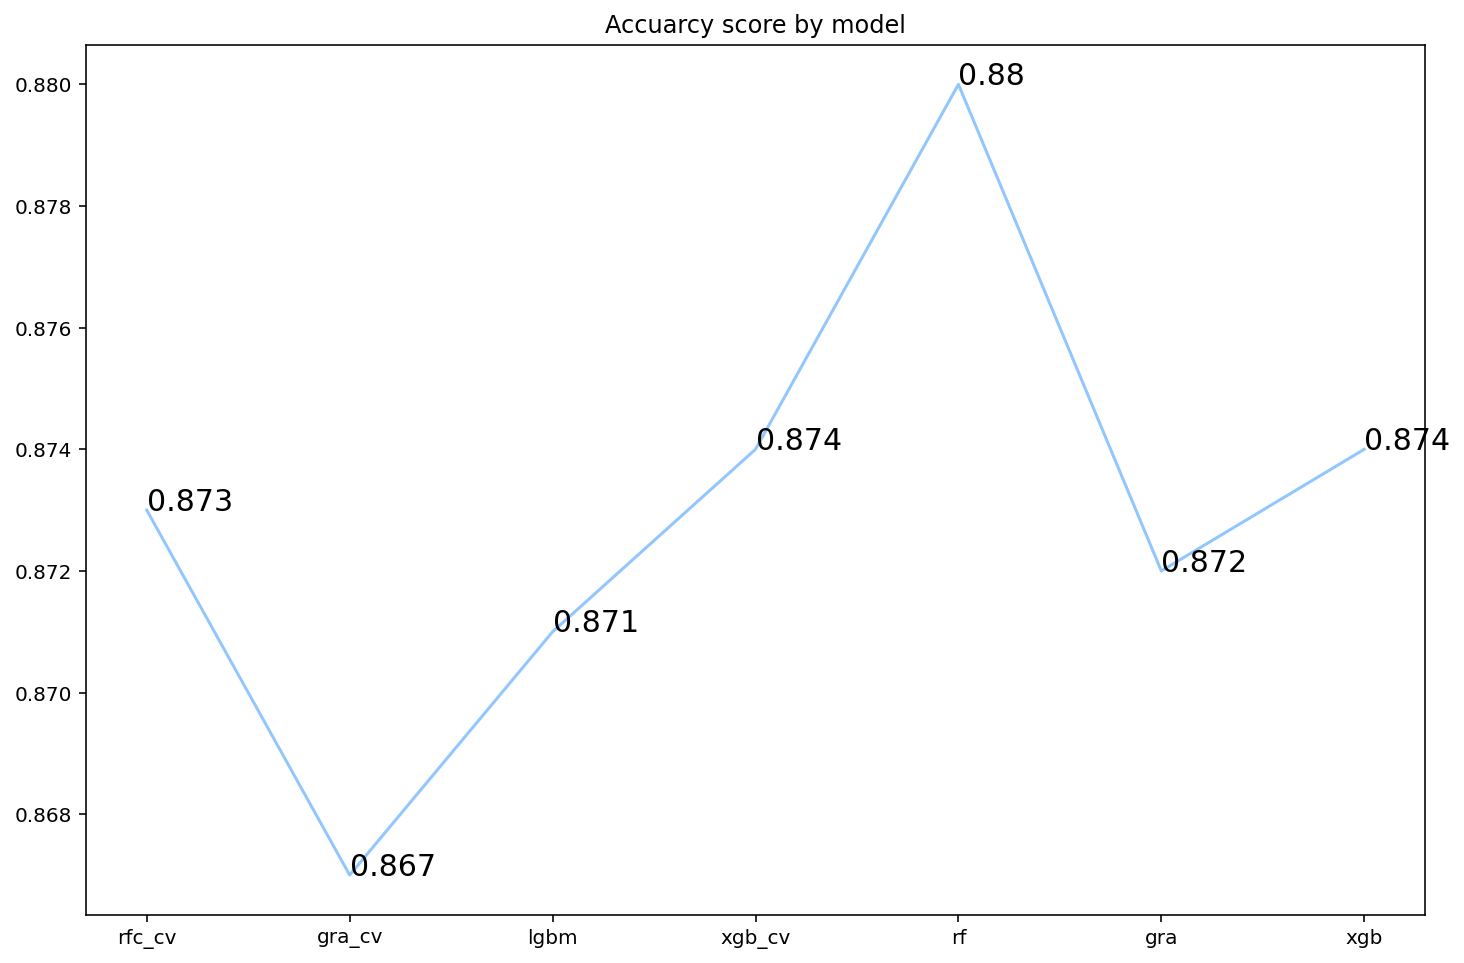

In [ ]:
plt.figure(figsize=(12,8))
ax = fig.add_subplot()
plt.plot(score_table['Model'],score_table['score'])
for i,j in zip(score_table['Model'],score_table['score']):
#     ax.annotate(str(j),xy=(i,j))
    plt.text(i, j, str(j),fontsize=15)
plt.title('Accuarcy score by model')
plt.show()

### Top 3 model = RandomForest , XGB_CV , XGBoost

In [ ]:
from sklearn.metrics import roc_curve , auc

In [ ]:
class_map = {'RandomForest':('-',rf),'XGBoost':('--',xgb),'xgb_cv':(':',xgb_cv.best_estimator_)}

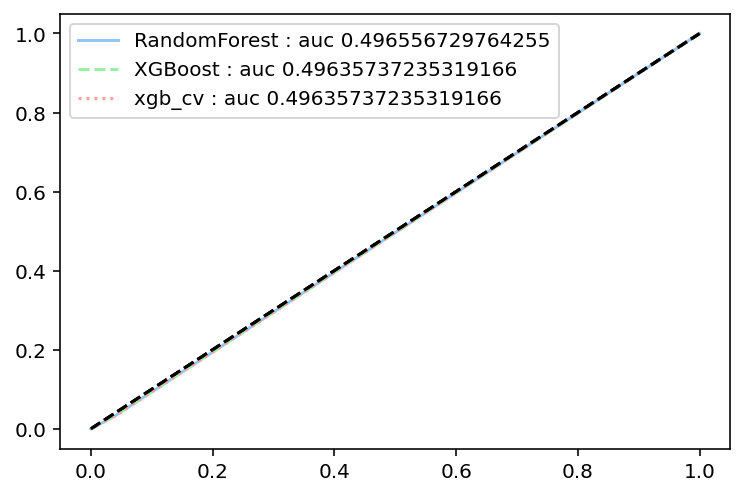

In [ ]:
result={}
for label,(line_fmt,model) in class_map.items():
    
    pred_y=model.predict(test_x)
    fpr,tpr,_ = roc_curve(test_y,pred_y)
    auc_score = auc(fpr,tpr)
    result[label]=auc_score
    txt='{} : auc {}'.format(label,auc_score)
    plt.plot(fpr,tpr,line_fmt,label=txt)
    plt.plot([0,1],[0,1],'k--')
    plt.legend()

 - ROC Curve로 했을 때 성능이 안좋으므로 f1-score가 낮은걸로 예상

인공 신경망은 컴퓨터 성능 차이로 인해 코드만 작성

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x2 = scaler.fit_transform(train_x)
test_x2 = scaler.fit_transform(test_x)

In [ ]:
train_tensor = torch.tensor(train_x2,dtype=torch.float)
train_output = torch.tensor(train_y,dtype=torch.float)
test_tensor = torch.tensor(test_x2,dtype=torch.float)
train_tensor=train_tensor.type(torch.FloatTensor)
train_output=train_output.type(torch.LongTensor)
test_tensor=test_tensor.type(torch.LongTensor)

In [ ]:
num_epoch = 1000
w=train_x.shape[1]
loss_func = nn.CrossEntropyLoss()

In [ ]:
model = nn.Sequential(nn.Linear(1*w,50*w),
                      nn.ReLU(),nn.Linear(50*w,100*w),
                     nn.LeakyReLU(),nn.Linear(100*w,50*w),
                     nn.Tanh(),nn.Linear(50*w,2*w)
                     )

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)



cuda:0


In [ ]:
loss_array=[]
optimizer = optim.Adam(model.parameters(),lr=0.002)
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(train_tensor).to(device)
    loss = loss_func(output,train_output)
    if i%100 == 0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)

RuntimeError: ignored